In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
colors=sns.color_palette('deep')
mpl.rcParams['xtick.labelsize'] = 14 
mpl.rcParams['ytick.labelsize'] = 14

In [2]:
with open('./logs/dump/res.pkl', 'rb') as handle:
    res = pickle.load(handle)

In [3]:
uav=["uav1","uav2","uav3","default_exp","uav5","uav6"]
mine=["mine1","mine2","mine3","default_exp","mine5","mine6"]
target=["target1","target2","target3","default_exp","target5","target6"]

In [4]:
#Individual plots

In [5]:
#Targets

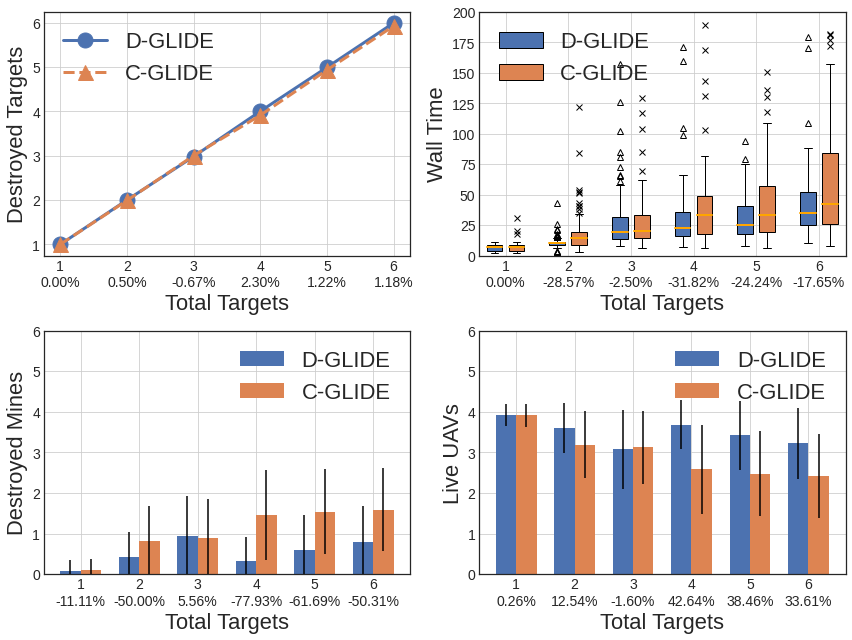

In [6]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,9))

pos=[1,2,3,4,5,6]
ax=axes[0][0]
ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_destroyed_targets']) for exp in target],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='D-GLIDE',color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_destroyed_targets']) for exp in target],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='C-GLIDE',color=colors[1])

gain=[100*((np.mean(res[exp+'_dis']['num_destroyed_targets'])-\
  np.mean(res[exp+'_cent']['num_destroyed_targets']))\
  /np.mean(res[exp+'_cent']['num_destroyed_targets']))\
  for exp in target]

ax.set_xticks(pos)
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Destroyed Targets',fontsize=22)
ax.grid()

prop='sim_time'
pos=[1,3,5,7,9,11]
sep=0.7
ax=axes[0][1]

bp1=\
ax.boxplot([res[e+"_dis"][prop] for e in target],
            positions=pos,
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='^',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[0]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

bp2=\
ax.boxplot([res[e+"_cent"][prop] for e in target],
            positions=[e+sep for e in pos],
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='x',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[1]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

gain=([100*((np.median(res[e+"_dis"][prop])-\
  np.median(res[e+"_cent"][prop]))\
  /np.median(res[e+"_cent"][prop]))\
  for e in target])

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
          prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Wall Time',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
#ax.set_xticklabels(['1','2','3','4','5','6'])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])

ax.set_ylim(0,200)
ax.grid()

prop='num_destroyed_mines'
pos=np.array([1,3,5,7,9,11])
sep=0.7

ax=axes[1][0]

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in target],
       yerr=[np.std(res[e+"_dis"][prop]) for e in target],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in target],
       yerr=[np.std(res[e+"_cent"][prop]) for e in target],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

gain=([100*((np.mean(res[e+"_dis"][prop])-\
  np.mean(res[e+"_cent"][prop]))\
  /np.mean(res[e+"_cent"][prop]))\
  for e in target])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Destroyed Mines',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
#ax.set_xticklabels(['1','2','3','4','5','6'])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,6)
ax.grid()

prop='num_live_uav'
pos=np.array([1,3,5,7,9,11])
sep=0.7

ax=axes[1][1]

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in target],
       yerr=[np.std(res[e+"_dis"][prop]) for e in target],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in target],
       yerr=[np.std(res[e+"_cent"][prop]) for e in target],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

gain=([100*((np.mean(res[e+"_dis"][prop])-\
  np.mean(res[e+"_cent"][prop]))\
  /np.mean(res[e+"_cent"][prop]))\
  for e in target])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Live UAVs',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
#ax.set_xticklabels(['1','2','3','4','5','6'])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,6)
ax.grid()

plt.tight_layout()
fig.savefig("./logs/dump/imp_with_targets.pdf")

In [7]:
#Mines

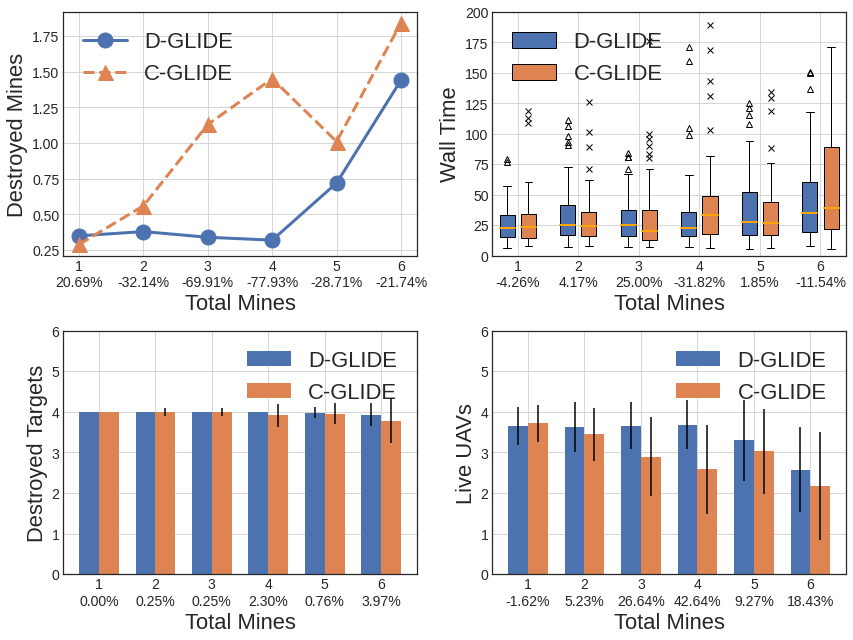

In [8]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,9))

pos=[1,2,3,4,5,6]
ax=axes[0][0]
ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_destroyed_mines']) for exp in mine],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='D-GLIDE',color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_destroyed_mines']) for exp in mine],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='C-GLIDE',color=colors[1])

gain=[100*((np.mean(res[exp+'_dis']['num_destroyed_mines'])-\
  np.mean(res[exp+'_cent']['num_destroyed_mines']))\
  /np.mean(res[exp+'_cent']['num_destroyed_mines']))\
  for exp in mine]

ax.legend(prop={'size':22},loc='best')
ax.set_xticks(pos)
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Destroyed Mines',fontsize=22)
plt.ylim(0,6)
ax.grid()

prop='sim_time'
pos=[1,3,5,7,9,11]
sep=0.7

ax=axes[0][1]

bp1=\
ax.boxplot([res[e+"_dis"][prop] for e in mine],
            positions=pos,
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='^',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[0]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

bp2=\
ax.boxplot([res[e+"_cent"][prop] for e in mine],
            positions=[e+sep for e in pos],
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='x',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[1]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

gain=([100*((np.median(res[e+"_dis"][prop])-\
  np.median(res[e+"_cent"][prop]))\
  /np.median(res[e+"_cent"][prop]))\
  for e in mine])

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
          prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Wall Time',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,200)
ax.grid()

prop='num_destroyed_targets'
pos=np.array([1,3,5,7,9,11])
sep=0.7

ax=axes[1][0]
bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in mine],
       yerr=[np.std(res[e+"_dis"][prop]) for e in mine],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in mine],
       yerr=[np.std(res[e+"_cent"][prop]) for e in mine],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

gain=([100*((np.mean(res[e+"_dis"][prop])-\
  np.mean(res[e+"_cent"][prop]))\
  /np.mean(res[e+"_cent"][prop]))\
  for e in mine])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Destroyed Targets',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,6)
ax.grid()

prop='num_live_uav'
pos=np.array([1,3,5,7,9,11])
sep=0.7

ax=axes[1][1]
bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in mine],
       yerr=[np.std(res[e+"_dis"][prop]) for e in mine],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in mine],
       yerr=[np.std(res[e+"_cent"][prop]) for e in mine],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

gain=([100*((np.mean(res[e+"_dis"][prop])-\
  np.mean(res[e+"_cent"][prop]))\
  /np.mean(res[e+"_cent"][prop]))\
  for e in mine])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Live UAVs',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,6)
ax.grid()
plt.tight_layout()
fig.savefig("./logs/dump/imp_with_mines.pdf")

In [9]:
#UAV

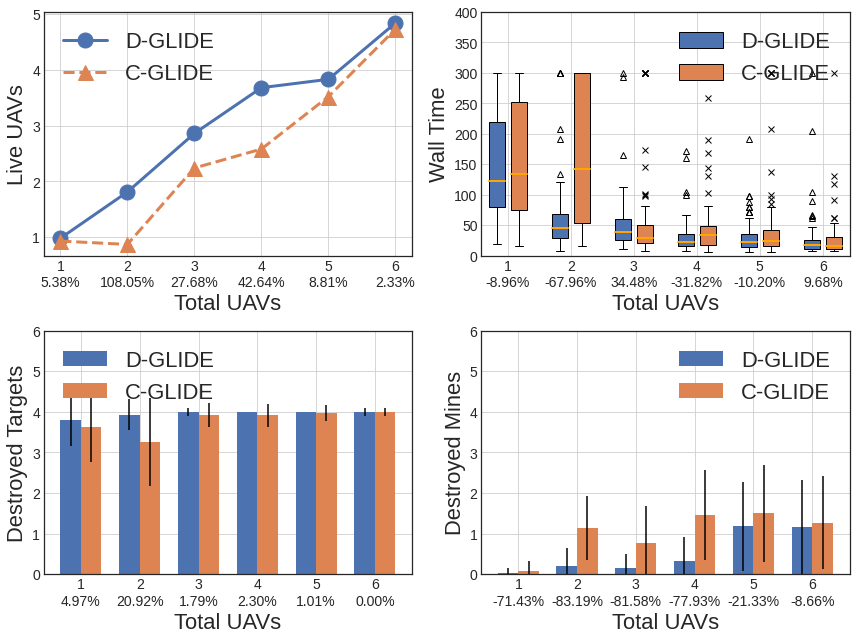

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,9))

pos=[1,2,3,4,5,6]
ax=axes[0][0]
ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_live_uav']) for exp in uav],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='D-GLIDE',color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_live_uav']) for exp in uav],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='C-GLIDE',color=colors[1])

gain=[100*((np.mean(res[exp+'_dis']['num_live_uav'])-\
  np.mean(res[exp+'_cent']['num_live_uav']))\
  /np.mean(res[exp+'_cent']['num_live_uav']))\
  for exp in uav]

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Live UAVs',fontsize=22)
ax.set_xticks(pos)
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
plt.ylim(0,6)
ax.grid()

prop='sim_time'
pos=[1,3,5,7,9,11]
sep=0.7

ax=axes[0][1]
bp1=\
ax.boxplot([res[e+"_dis"][prop] for e in uav],
            positions=pos,
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='^',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[0]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

bp2=\
ax.boxplot([res[e+"_cent"][prop] for e in uav],
            positions=[e+sep for e in pos],
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='x',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[1]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )
gain=([100*((np.median(res[e+"_dis"][prop])-\
  np.median(res[e+"_cent"][prop]))\
  /np.median(res[e+"_cent"][prop]))\
  for e in uav])

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
          prop={'size':22},loc='upper right')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Wall Time',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,400)
ax.grid()

prop='num_destroyed_targets'
pos=np.array([1,3,5,7,9,11])
sep=0.7

ax=axes[1][0]
bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in uav],
       yerr=[np.std(res[e+"_dis"][prop]) for e in uav],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in uav],
       yerr=[np.std(res[e+"_cent"][prop]) for e in uav],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

gain=([100*((np.mean(res[e+"_dis"][prop])-\
  np.mean(res[e+"_cent"][prop]))\
  /np.mean(res[e+"_cent"][prop]))\
  for e in uav])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Destroyed Targets',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,6)
ax.grid()

prop='num_destroyed_mines'
pos=np.array([1,3,5,7,9,11])
sep=0.7

ax=axes[1][1]
bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in uav],
       yerr=[np.std(res[e+"_dis"][prop]) for e in uav],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in uav],
       yerr=[np.std(res[e+"_cent"][prop]) for e in uav],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

gain=([100*((np.mean(res[e+"_dis"][prop])-\
  np.mean(res[e+"_cent"][prop]))\
  /np.mean(res[e+"_cent"][prop]))\
  for e in uav])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Destroyed Mines',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels([f"{e}\n{gain[i]:.2f}%" for i,e in enumerate(range(1,7))])
ax.set_ylim(0,6)
ax.grid()
plt.tight_layout()
fig.savefig("./logs/dump/imp_with_uavs.pdf")

In [11]:
#NICE